# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"`

In [18]:
#!pip install autoviz
#!pip install wordcloud

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from autoviz.AutoViz_Class import AutoViz_Class
import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.tree import tree
from sklearn.tree import export_text


In [36]:
data = pd.read_csv('Fraud_check.csv')
data.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Shape of your Data Set loaded: (600, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


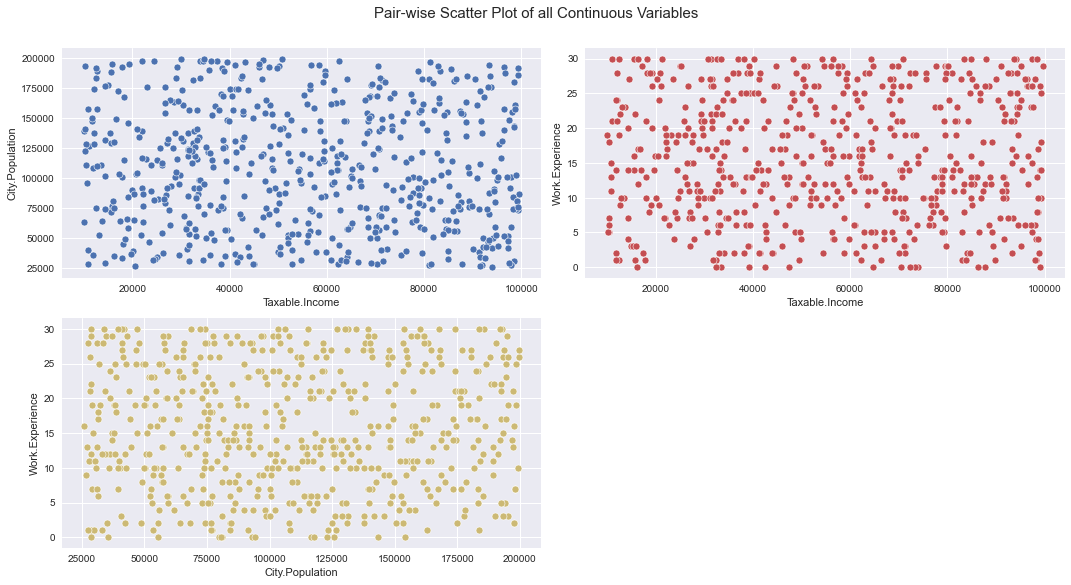

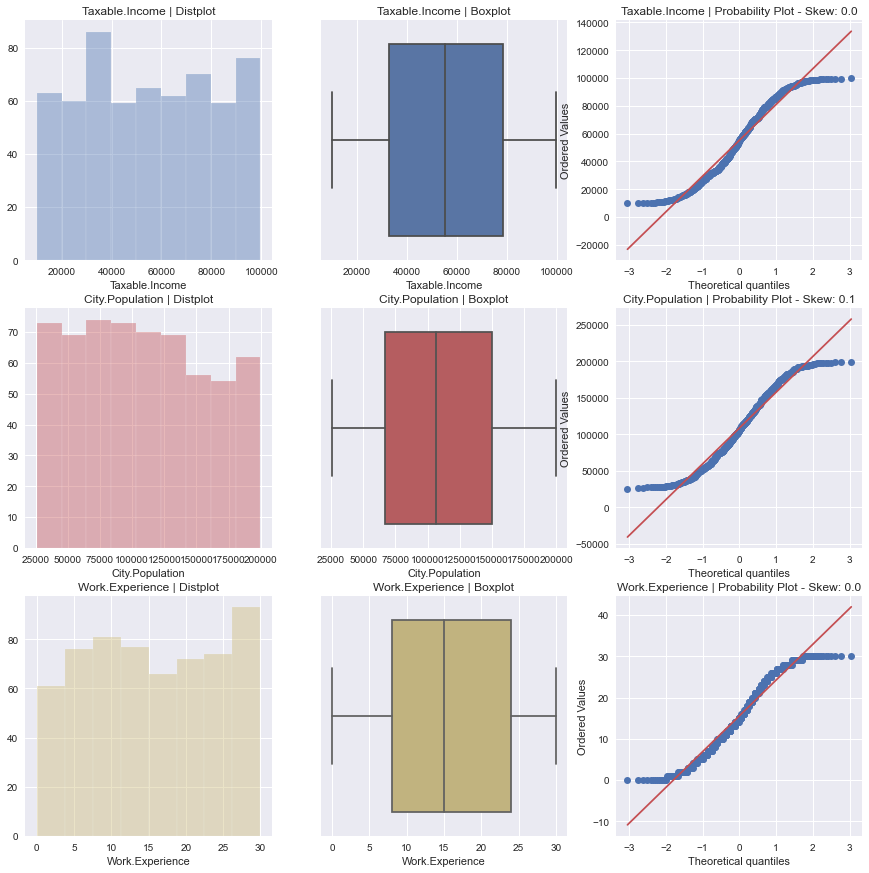

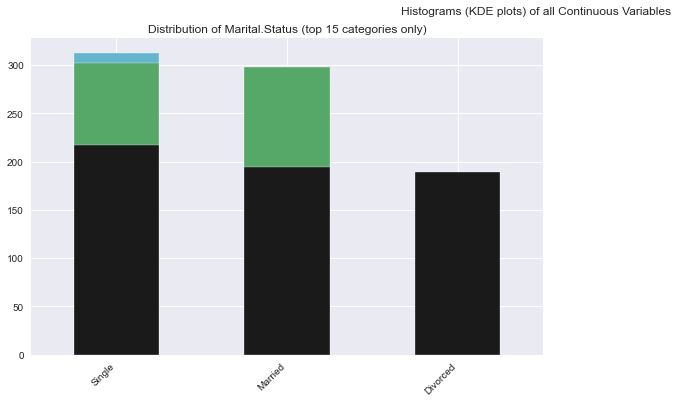

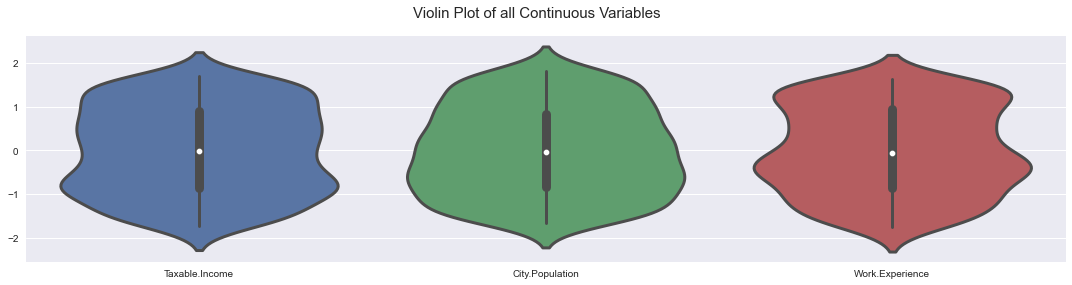

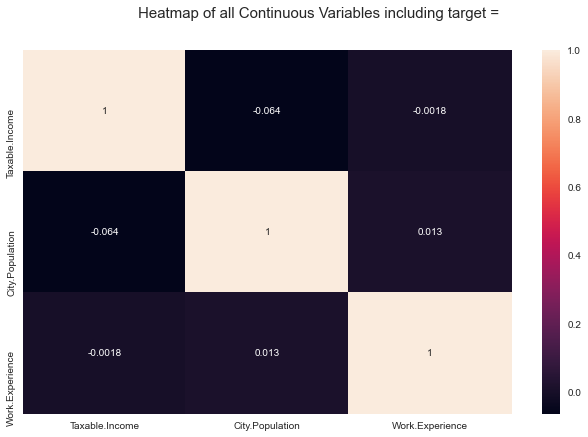

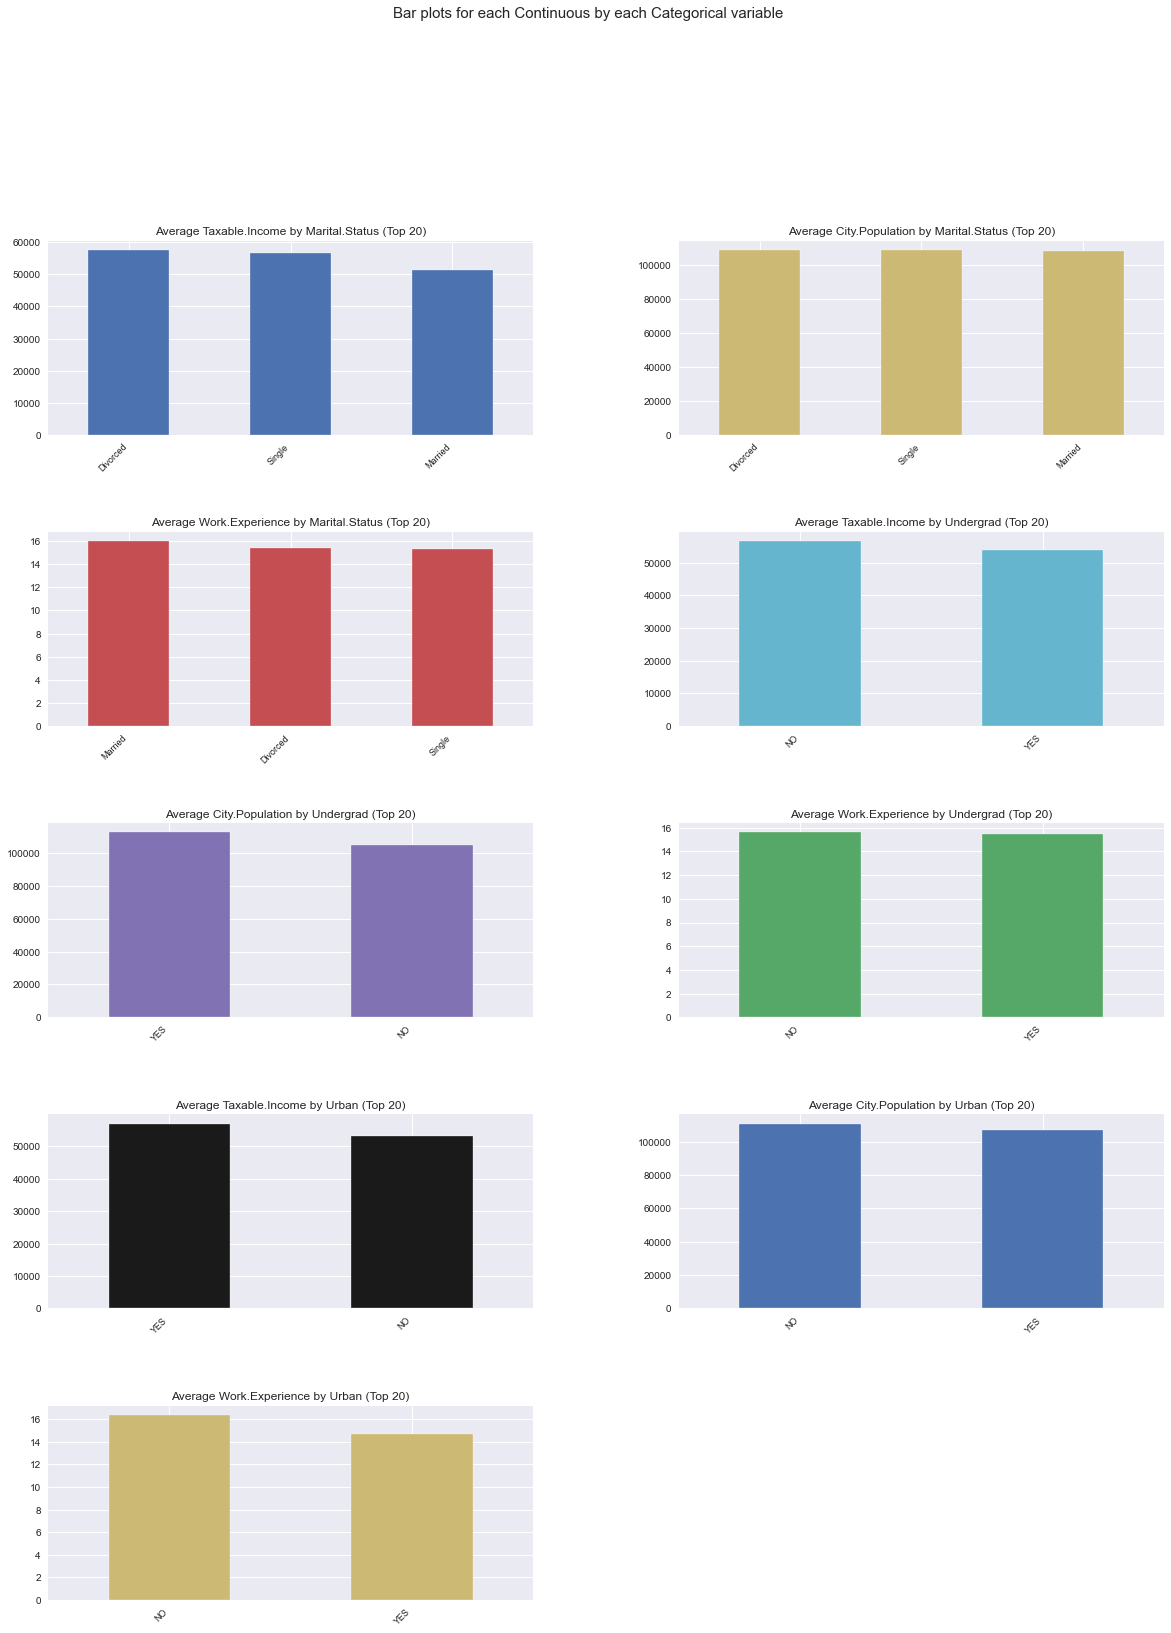

Time to run AutoViz (in seconds) = 5.142

 ###################### VISUALIZATION Completed ########################


In [22]:
av = AutoViz_Class()
filename = 'Fraud_check.csv'
dft = av.AutoViz(filename,depVar="",dfte=None, header=0, verbose=0, lowess=False, 
                 chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [38]:
data = data.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [40]:
data['is_Check']= ['Risky' if x <= 30000 else 'Good' for x in data['taxable_income']]
data.head(1)

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,NO,Single,68833,50047,10,YES,Good


In [41]:
label_encoder = LabelEncoder()
data['is_Check'] = label_encoder.fit_transform(data['is_Check'])

In [43]:
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])

In [45]:
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [48]:
data.head(1)

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,0,2,68833,50047,10,1,0


In [47]:
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])

In [74]:
data=data[['Undergrad','marital_status','city_population','work_exp','Urban','is_Check']]
data.head(1)

,Undergrad,marital_status,city_population,work_exp,Urban,is_Check
0,0,2,50047,10,1,0


In [75]:
X = data.iloc[:,0:5]
Y = data.iloc[:,5]

In [59]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [87]:
norm_fraud = norm_func(data.iloc[:,0:5])
norm_fraud.head(1)

,Undergrad,marital_status,city_population,work_exp,Urban
0,0.0,1.0,0.139472,0.333333,1.0


In [77]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X) 
#X = pd.DataFrame(scaled_data)


In [89]:
norm_fraud.head(1)

,Undergrad,marital_status,city_population,work_exp,Urban
0,0.0,1.0,0.139472,0.333333,1.0


In [85]:
X.columns.names = data.iloc[:,0:5].columns.names

In [91]:
x_train,x_test,y_train,y_test = train_test_split(norm_fraud,Y,test_size = 0.3,random_state = 0)

In [92]:
clf = RandomForestClassifier(n_estimators= 10,random_state= 0)

In [94]:
model = clf.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [97]:
print("confusion_matrix:",confusion_matrix(y_test, y_pred))

print("Classification_report:",classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_test, y_pred)*100)

confusion_matrix: [[128   9]
 [ 39   4]]
Classification_report:               precision    recall  f1-score   support

           0       0.77      0.93      0.84       137
           1       0.31      0.09      0.14        43

    accuracy                           0.73       180
   macro avg       0.54      0.51      0.49       180
weighted avg       0.66      0.73      0.68       180

Accuracy: 73.33333333333333


In [102]:
for i in range(len(clf.estimators_)):
    print(export_text(clf.estimators_[i]))

|--- feature_2 <= 0.66
|   |--- feature_2 <= 0.43
|   |   |--- feature_1 <= 0.25
|   |   |   |--- feature_3 <= 0.65
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.33
|   |   |   |   |   |   |--- feature_3 <= 0.32
|   |   |   |   |   |   |   |--- feature_3 <= 0.02
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_3 >  0.02
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_3 >  0.32
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_2 >  0.33
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  0.50


# Random Forest

 Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [137]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.feature_selection import SelectFromModel

In [105]:
df=pd.read_csv("Company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<AxesSubplot:>

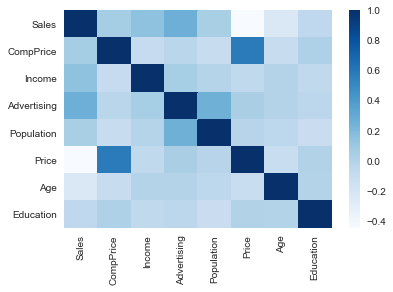

In [106]:
cor = df.corr()
sns.heatmap(cor,cmap='Blues')

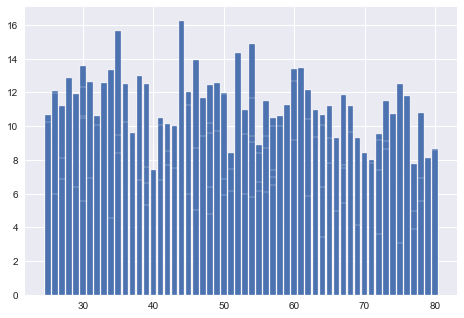

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Age,df.Sales)
plt.show()

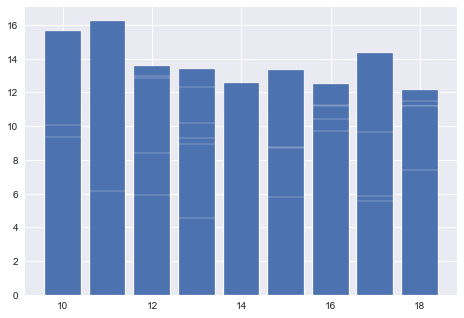

In [108]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Education,df.Sales)
plt.show()

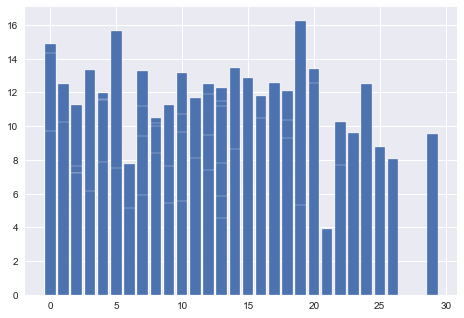

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Advertising,df.Sales)
plt.show()

<AxesSubplot:xlabel='CompPrice', ylabel='Income'>

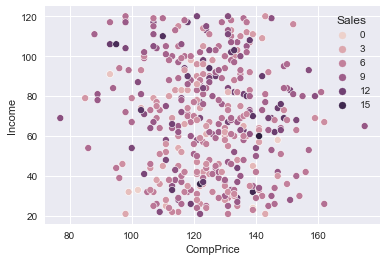

In [112]:
sns.scatterplot(df['CompPrice'],df['Income'],hue=df['Sales'])

<AxesSubplot:xlabel='Age', ylabel='Education'>

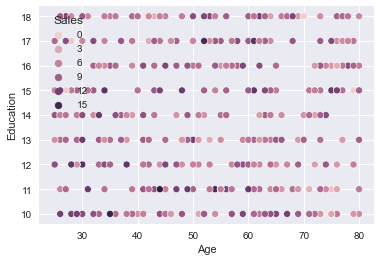

In [113]:
sns.scatterplot(df['Age'],df['Education'],hue=df['Sales'])

<AxesSubplot:xlabel='Advertising', ylabel='Population'>

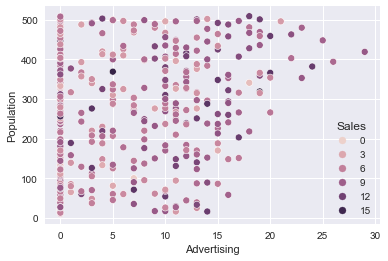

In [114]:
sns.scatterplot(df['Advertising'],df['Population'],hue=df['Sales'])

In [116]:
label_encoder = LabelEncoder()
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

In [122]:
df1=pd.get_dummies(df,columns=['ShelveLoc'])

In [123]:
df1.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.5,138,73,11,276,120,42,17,1,1,1,0,0


In [124]:
df1 = df1.astype({"Sales":'category'})

In [128]:
X=df1.iloc[:,1:]
Y=df1.iloc[:,0]

In [129]:
X_train,X_test,y_train,y_test=(train_test_split(X,Y,test_size=.3,random_state=0))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
regressor=RandomForestRegressor(n_estimators=20 , random_state=0)
regressor.fit(X_train,y_train)

NameError: name 'RandomForestRegressor' is not defined

In [132]:
regressor=RandomForestRegressor(n_estimators=20 , random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [133]:
y_pred=regressor.predict(X_test)

In [136]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.226625
Mean Squared Error: 2.401580920833334
Root Mean Squared Error: 1.5497034944896182


In [138]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [139]:
sel.get_support()

array([ True, False, False, False,  True,  True, False, False, False,
        True,  True, False])